In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import math
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from IPython.display import HTML, Javascript
import ipywidgets as widgets

In [16]:
# from http://blog.nextgenetics.net/?a=2014-m09

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [17]:
def slope(time1, time2, time3):
    """
    returns the slope of the mean response times for 3, 6, and 12 items
    """
    X = [3,6,12]
    y = [time1, time2, time3]
    X = sm.add_constant(X) ## adds intercept to regression model
    
    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

    return model.params[1]

### TO DO

- Make excluding outliers better:
    - set exclusion list to list of outliers, re-run code
- Add error rates to error output?
- More user friendly readout of important numbers
- Add explanations of calculations
- Look into error rate calculations: check excel sheet? Errors for present only, separate?
- Make sure this gives same results as excel >> test a few
- Handling negative slopes?
- exclusions from demographics
- Descriptions of outputs embedded
- Description of how sheet works/how to use at end/separate notebook
- Label graphs better
- Log transformed histograms
- Add selection for transforming slope ratios: raw, sqrt,log

In [18]:
exclude = []

In [19]:
# import data
long_raw = pd.read_csv('Long Line.csv',
                       names = ["SubjectNumber", "Block", "Trial", "Time", 'Key', 'Exp', 'Error', 'Condition'])
short_raw = pd.read_csv('Short Line.csv',
                        names = ["SubjectNumber", "Block", "Trial", "Time", 'Key', 'Exp', 'Error', 'Condition'])

In [20]:
# set error exclusion threshold (exclude participants with greater error rates)
excl_crit = 0.1

# list participants with error rates above threshold
lrm = long_raw.groupby(by = ['SubjectNumber','Condition']).mean()
long_raw_means = long_raw.groupby(by = ['SubjectNumber','Condition']).mean().groupby(by = ['SubjectNumber']).mean()
short_raw_means = short_raw.groupby(by = ['SubjectNumber','Condition']).mean().groupby(by = ['SubjectNumber']).mean()
long_errors = long_raw_means[long_raw_means['Error'] < (1 - excl_crit)]
short_errors = short_raw_means[short_raw_means['Error'] < (1 - excl_crit)]
exclude_long = long_errors.index.tolist()
exclude_short = short_errors.index.tolist()
exclude = exclude + exclude_long + exclude_short

## Participants with error rates above threshold
(Excluded from further analysis)

### Long line

In [21]:
if exclude_long == []:
    print('None')
else:
    print(exclude_long)

None


### Short line

In [22]:
if exclude_short == []:
    print('None')
else:
    print(exclude_short)

None


### Threshold

In [23]:
print(str(excl_crit * 100) + '%')

10.0%


In [24]:
# read raw data
long_data = pd.read_csv('Long Line.csv',
                        names = ["SubjectNumber", "Block", "Trial", "Time", 'Key', 'Exp', 'Error', 'Condition'])
short_data = pd.read_csv('Short Line.csv',
                         names = ["SubjectNumber", "Block", "Trial", "Time", 'Key', 'Exp', 'Error', 'Condition'])

# exclude error trials
long_data = long_data[long_data['Error'] == 1]
short_data = short_data[short_data['Error'] == 1]

# exclude participants with error rate above exclusion threshold
long_data = long_data[~long_data['SubjectNumber'].isin(exclude)]
short_data = short_data[~short_data['SubjectNumber'].isin(exclude)]

# log transform Time
long_data['Time'] = long_data['Time'].apply(math.log10)
short_data['Time'] = short_data['Time'].apply(math.log10)

# create a table of mean response time in each condition (target type x item number)
# PRESENT trials
long3 = long_data[(long_data['Condition'] == 1) & (long_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()
long6 = long_data[(long_data['Condition'] == 2) & (long_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()
long12 = long_data[(long_data['Condition'] == 3) & (long_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()
short3 = short_data[(short_data['Condition'] == 1) & (short_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()
short6 = short_data[(short_data['Condition'] == 2) & (short_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()
short12 = short_data[(short_data['Condition'] == 3) & (short_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()

# ABSENT trials
a_long3 = long_data[(long_data['Condition'] == 1) & (long_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()
a_long6 = long_data[(long_data['Condition'] == 2) & (long_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()
a_long12 = long_data[(long_data['Condition'] == 3) & (long_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()
a_short3 = short_data[(short_data['Condition'] == 1) & (short_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()
a_short6 = short_data[(short_data['Condition'] == 2) & (short_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()
a_short12 = short_data[(short_data['Condition'] == 3) & (short_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()

# assemble lists into dataframe
present_data_log = pd.DataFrame({'long3':long3['Time'], 'long6':long6['Time'], 'long12':long12['Time'],
                             'short3':short3['Time'], 'short6':short6['Time'], 'short12':short12['Time']})

absent_data_log = pd.DataFrame({'long3':a_long3['Time'], 'long6':a_long6['Time'], 'long12':a_long12['Time'],
                             'short3':a_short3['Time'], 'short6':a_short6['Time'], 'short12':a_short12['Time']})

# backtransform log times
present_data = 10**present_data_log
absent_data = 10**absent_data_log

# add columns for slopes and slope ratio
present_data['long_slope'] = slope(present_data['long3'], present_data['long6'], present_data['long12'])
present_data['short_slope'] = slope(present_data['short3'], present_data['short6'], present_data['short12'])
present_data['slope_ratio'] = present_data['short_slope']/present_data['long_slope']
present_data['slope_ratio_sqrt'] = np.sqrt(present_data['slope_ratio'])

absent_data['long_slope'] = slope(absent_data['long3'], absent_data['long6'], absent_data['long12'])
absent_data['short_slope'] = slope(absent_data['short3'], absent_data['short6'], absent_data['short12'])
absent_data['slope_ratio'] = absent_data['short_slope']/absent_data['long_slope']
absent_data['slope_ratio_sqrt'] = np.sqrt(absent_data['slope_ratio'])

# add baselines
present_data['long_base'] = present_data['long12'] - present_data['long_slope'] * 11
present_data['short_base'] = present_data['short12'] - present_data['short_slope'] * 11
absent_data['long_base'] = present_data['long12'] - present_data['long_slope'] * 11
absent_data['short_base'] = present_data['short12'] - present_data['short_slope'] * 11

## Present data

In [25]:
present_data.round(3)

,long3,long6,long12,short3,short6,short12,long_slope,short_slope,slope_ratio,slope_ratio_sqrt,long_base,short_base
SubjectNumber,,,,,,,,,,,,
1,1176.035,1199.415,1714.006,996.065,1177.953,1527.367,63.488,58.920,0.928,0.963,1015.643,879.252
2,825.426,1079.001,1577.299,852.681,1082.481,1315.243,83.471,49.595,0.594,0.771,659.116,769.693
3,842.587,1148.614,1357.055,1156.636,1258.601,1580.630,53.960,48.048,0.890,0.944,763.496,1052.105
4,988.143,1087.885,1511.089,1428.006,1939.638,2694.628,59.881,138.607,2.315,1.521,852.402,1169.955
5,799.526,871.306,1084.953,856.567,1080.385,1234.860,32.270,39.706,1.230,1.109,729.979,798.096
6,1023.676,1264.810,1604.251,1152.908,1309.130,1584.798,63.375,47.696,0.753,0.868,907.129,1060.143
7,802.786,1002.408,1006.958,772.026,884.458,1068.610,19.553,32.631,1.669,1.292,791.872,709.672
8,778.892,811.243,969.148,859.173,964.549,1445.245,21.879,67.262,3.074,1.753,728.476,705.368
9,1472.881,2432.998,2371.151,1265.661,1321.390,1570.674,84.077,34.984,0.416,0.645,1446.304,1185.848


#### Summary statistics

In [26]:
present_desc = present_data.describe()
present_desc.round(3)

,long3,long6,long12,short3,short6,short12,long_slope,short_slope,slope_ratio,slope_ratio_sqrt,long_base,short_base
count,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000
mean,986.622,1189.153,1439.155,1086.884,1231.492,1619.925,49.051,60.014,1.474,1.167,899.596,959.769
std,235.874,362.882,391.377,243.155,304.608,447.407,22.860,29.834,0.906,0.341,229.209,215.473
min,671.209,798.001,935.557,772.026,821.774,1068.610,16.966,32.631,0.416,0.645,583.931,678.996
25%,809.255,993.552,1103.380,856.841,1067.597,1345.399,29.974,40.818,0.880,0.938,737.823,756.155
50%,880.362,1086.151,1430.705,1048.219,1210.021,1575.652,44.352,48.934,1.221,1.105,823.388,978.846
75%,1183.629,1272.253,1663.823,1277.263,1323.286,1735.845,64.626,66.686,1.673,1.293,1012.802,1171.413
max,1472.881,2432.998,2371.151,1670.923,2078.336,2990.811,86.775,147.429,3.863,1.966,1446.304,1369.090


#### t-test

In [27]:
present_t = stats.ttest_rel(present_data['short_slope'],present_data['long_slope'])
present_t

Ttest_relResult(statistic=1.5563030448960287, pvalue=0.13329025391649255)

### Summary:

In [28]:
print('Long slope: Mean: ' + str(round(present_desc['long_slope']['mean'],3)))
print('            SD: ' + str(round(present_desc['long_slope']['std'],3)))
print('Short slope: Mean: ' + str(round(present_desc['short_slope']['mean'],3)))
print('             SD: ' + str(round(present_desc['short_slope']['mean'],3)))
print('t-statistic: ' + str(round(present_t[1],5)))
print('p-value: ' + str(round(present_t[1],5)))
print('')
print('Long baseline: Mean: ' + str(round(present_desc['long_base']['mean'],3)))
print('               SD: ' + str(round(present_desc['long_base']['std'],3)))
print('Short baseline: Mean: ' + str(round(present_desc['short_base']['mean'],3)))
print('               SD: ' + str(round(present_desc['short_base']['std'],3)))



Long slope: Mean: 49.051
            SD: 22.86
Short slope: Mean: 60.014
             SD: 60.014
t-statistic: 0.13329
p-value: 0.13329

Long baseline: Mean: 899.596
               SD: 229.209
Short baseline: Mean: 959.769
               SD: 215.473


## Absent data

In [29]:
absent_data.round(3)

,long3,long6,long12,short3,short6,short12,long_slope,short_slope,slope_ratio,slope_ratio_sqrt,long_base,short_base
SubjectNumber,,,,,,,,,,,,
1,2455.576,2602.798,3662.264,1379.790,1587.588,2159.286,140.148,87.850,0.627,0.792,1015.643,879.252
2,1028.876,1412.344,2172.344,1403.716,1827.921,2721.271,126.997,146.752,1.156,1.075,659.116,769.693
3,1026.064,1433.724,1686.656,1181.739,1622.874,1852.888,68.936,69.396,1.007,1.003,763.496,1052.105
4,853.233,1226.878,1558.408,1410.977,1976.286,2825.042,75.053,154.881,2.064,1.437,852.402,1169.955
5,944.831,1221.402,1537.417,1148.310,1203.585,1954.831,63.961,94.698,1.481,1.217,729.979,798.096
6,1179.023,1710.312,2055.634,1796.354,2335.281,2957.397,91.709,125.388,1.367,1.169,907.129,1060.143
7,981.047,1225.501,1504.560,1083.841,1624.197,2193.138,56.503,119.193,2.110,1.452,791.872,709.672
8,914.580,1236.270,1483.590,1257.862,1821.723,2526.740,60.080,137.632,2.291,1.514,728.476,705.368
9,2266.424,3151.429,3947.551,1350.419,1611.272,2360.524,179.063,114.040,0.637,0.798,1446.304,1185.848


#### Summary statistics

In [30]:
absent_desc = absent_data.describe()
absent_desc.round(3)

,long3,long6,long12,short3,short6,short12,long_slope,short_slope,slope_ratio,slope_ratio_sqrt,long_base,short_base
count,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000
mean,1267.022,1668.764,2087.449,1336.243,1723.290,2384.206,88.105,115.542,1.892,1.253,899.596,959.769
std,425.843,563.899,729.123,250.240,269.748,431.098,42.559,40.592,2.647,0.579,229.209,215.473
min,820.233,930.195,1117.934,963.268,1203.585,1282.712,12.273,30.500,0.627,0.792,583.931,678.996
25%,1003.754,1226.534,1541.803,1144.450,1595.108,2147.559,59.186,85.516,0.972,0.986,737.823,756.155
50%,1121.220,1500.840,2011.162,1359.373,1725.363,2435.227,84.156,116.959,1.230,1.109,823.388,978.846
75%,1404.527,1880.476,2494.332,1432.455,1871.263,2691.806,125.288,148.304,1.886,1.373,1012.802,1171.413
max,2455.576,3151.429,3947.551,1894.815,2335.281,3056.502,179.063,179.992,14.051,3.748,1446.304,1369.090


#### t-test

In [31]:
stats.ttest_rel(absent_data['short_slope'],absent_data['long_slope'])

Ttest_relResult(statistic=2.773464120272972, pvalue=0.010808323392464231)

In [32]:
def draw_histogram(col):
    present_data[col].plot.hist()
    plt.axvline(present_desc[col]['mean'] - present_desc[col]['std'] * 2, color='r')
    plt.axvline(present_desc[col]['mean'] + present_desc[col]['std'] * 2, color='r')

def draw_density(col):
    present_data[col].plot.kde(bw_method=0.2)
    plt.axvline(present_desc[col]['mean'] - present_desc[col]['std'] * 2, color='r')
    plt.axvline(present_desc[col]['mean'] + present_desc[col]['std'] * 2, color='r')

In [33]:
widgets.interact(draw_histogram, col=['long_slope','short_slope','slope_ratio','slope_ratio_sqrt'])

interactive(children=(Dropdown(description='col', options=('long_slope', 'short_slope', 'slope_ratio', 'slope_…

<function __main__.draw_histogram(col)>

In [34]:
widgets.interact(draw_density, col=['long_slope','short_slope','slope_ratio','slope_ratio_sqrt'])

interactive(children=(Dropdown(description='col', options=('long_slope', 'short_slope', 'slope_ratio', 'slope_…

<function __main__.draw_density(col)>

## Outlier tests

In [35]:
out_crit = 2

In [36]:
# list participants with a slope/ratio over 2 sd from the mean
high_long = present_data[present_data['long_slope'] > 
                         present_desc['long_slope']['mean'] + present_desc['long_slope']['std'] * out_crit]
high_short = present_data[present_data['short_slope'] > 
                          present_desc['short_slope']['mean'] + present_desc['short_slope']['std'] * out_crit]
high_ratio = present_data[present_data['slope_ratio_sqrt'] > 
                          present_desc['slope_ratio_sqrt']['mean'] + present_desc['slope_ratio_sqrt']['std'] * out_crit]

low_long = present_data[present_data['long_slope'] < 
                         present_desc['long_slope']['mean'] - present_desc['long_slope']['std'] * out_crit]
low_short = present_data[present_data['short_slope'] < 
                          present_desc['short_slope']['mean'] - present_desc['short_slope']['std'] * out_crit]
low_ratio = present_data[present_data['slope_ratio_sqrt'] < 
                          present_desc['slope_ratio_sqrt']['mean'] - present_desc['slope_ratio_sqrt']['std'] * out_crit]

#### High long slope

In [37]:
if high_long.index.tolist() == []:
    print('None')
else:
    for i in high_long.index.tolist():
        x = (present_data['long_slope'][i] - present_desc['long_slope']['mean'])/present_desc['long_slope']['std']
        print('Subject ' + str(i) + '  z-score: ' + str(x))

None


#### Low long slope

In [38]:
if low_long.index.tolist() == []:
    print('None')
else:
    for i in low_long.index.tolist():
        x = (present_data['long_slope'][i] - present_desc['long_slope']['mean'])/present_desc['long_slope']['std']
        print('Subject ' + str(i) + '  z-score: ' + str(x))

None


#### High short slope

In [39]:
if high_short.index.tolist() == []:
    print('None')
else:
    for i in high_short.index.tolist():
        x = (present_data['short_slope'][i] - present_desc['short_slope']['mean'])/present_desc['short_slope']['std']
        print('Subject ' + str(i) + '  z-score: ' + str(x))

Subject 4  z-score: 2.634310258218714
Subject 16  z-score: 2.9300289619196223


#### Low short slope

In [40]:
if low_short.index.tolist() == []:
    print('None')
else:
    for i in low_short.index.tolist():
        x = (present_data['short_slope'][i] - present_desc['short_slope']['mean'])/present_desc['short_slope']['std']
        print('Subject ' + str(i) + '  z-score: ' + str(x))

None


#### High slope ratio

In [41]:
if high_ratio.index.tolist() == []:
    print('None')
else:
    for i in high_ratio.index.tolist():
        x = (present_data['slope_ratio'][i] - present_desc['slope_ratio']['mean'])/present_desc['slope_ratio']['std']
        print('Subject ' + str(i) + '  z-score: ' + str(x))

Subject 13  z-score: 2.2881034909578375
Subject 16  z-score: 2.6386666223716464


#### Low slope ratio

In [42]:
if low_ratio.index.tolist() == []:
    print('None')
else:
    for i in low_ratio.index.tolist():
        x = (present_data['slope_ratio'][i] - present_desc['slope_ratio']['mean'])/present_desc['slope_ratio']['std']
        print('Subject ' + str(i) + '  z-score: ' + str(x))

None


## Demographic data

In [43]:
demo_filename='50NS(T2).LinkingOnlyDemographicsTest.csv'

In [44]:
# import data
col_list = list(range(0,37))
demo_data = pd.read_csv(demo_filename, header=1, index_col='SubjectNumber', usecols=col_list, nrows=16)
demo_data

,Qs,Subject ID,Ethnicity,Condition,Gender,Handedness,Eyewear,Age,Time,YearsInCanada,...,%4,2ndMostCompetentLanguage_ThroughoutLife,%5,3rdMostCompetentLanguage_ThroughoutLife,%6,first_aquired_written_language,first_aquired_reading_language,first_aquired_speaking_language,stress,stress_reason
SubjectNumber,,,,,,,,,,,,,,,,,,,,,
1,01Q,01JF,CAUCASIAN,50NST2,Female,Right,None,19,0,19.00,...,98,FRENCH,2,0,0.00,ENGLISH,ENGLISH,ENGLISH,3.0,3 FROM SCHOOL WORK
2,02Q,02MK,Turkish,50ND(T2),Female,Right,None,27,4PM,0.10,...,90,English,10,0,0.00,Turkish,Turkish,Turkish,2.0,2
3,03Q,03TY,Chinese,42NST2,Female,Right,Contacts,24,0,23.00,...,70,Cantonese,25,Mandarin,2.00,English,English,Cantonese,6.0,6 - school
4,04Q,04AY,Arab,49.T2,Female,Right,None,22,0.625,0.50,...,55,Arabic,45,0,0.00,English,English,English,0.0,0
5,05Q,05EL,Asian,50NS(T2),Female,Right,None,21,0,4.00,...,45,Mandarin,45,English,10.00,Mandarin,Mandarin,Cantonese,4.0,stress level: 4
6,06Q,06AM,South and Southeast Asian,50NST2,Female,Right,None,19,3PM,2.00,...,80,Spanish,15,Mandarin,5.00,English,English,English,4.0,4- anxiety about medication and upcoming midterm
7,07Q,07CL,Asian,50NS(T2),Female,Right,None,18,2PM,1.00,...,70,English,30,0,0.00,Cantonese,Cantonese,Cantonese,5.0,5 (school & others)
8,08Q,08AH,German,50NS(T2).LikingOnly,Female,Left,None,24,11:00am,0.25,...,80,English,15,Spanish,3.00,German,German,German,3.0,3 - personal
9,09Q,01AP,South east asian,50 T2,Female,Right,None,20,0.5,20.00,...,100,0,0,0,0.00,English,English,English,0.0,0


### Slope ratio and years in Canada correlation

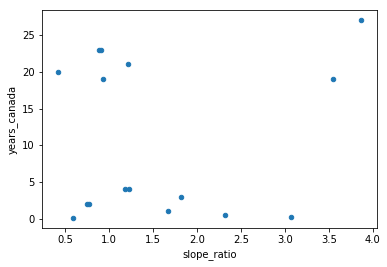

In [45]:
corr_frame = pd.DataFrame({'slope_ratio':present_data['slope_ratio'],
                           'stress':demo_data['stress'],
                           'years_canada':demo_data['YearsInCanada'],
                           'perc_in_can':demo_data['Calculated_PercIN']})

corr_frame.plot.scatter('slope_ratio','years_canada')

In [46]:
corr_out = stats.pearsonr(present_data['slope_ratio'],demo_data['YearsInCanada'])
print("Pearson's r: " + str(corr_out[0]) + '   p-value: ' + str(corr_out[1]))

ValueError: operands could not be broadcast together with shapes (24,) (16,) 

In [ ]:
corr_out = stats.pearsonr(present_data['slope_ratio'],demo_data['Calculated_PercIN'])
print("Pearson's r: " + str(corr_out[0]) + '   p-value: ' + str(corr_out[1]))

### Slope ratio and stress correlation

In [ ]:
corr_frame.plot.scatter('slope_ratio','stress')

In [ ]:
corr_out = stats.pearsonr(present_data['slope_ratio'],demo_data['stress'])
print("Pearson's r: " + str(corr_out[0]) + '   p-value: ' + str(corr_out[1]))

### Comparison of participants living in Canada less/more than 2 years

In [ ]:
stats.ttest_ind(corr_frame[corr_frame['years_canada'] < 2]['slope_ratio'],
                corr_frame[corr_frame['years_canada'] >= 2]['slope_ratio'])

##  Graphs

In [ ]:
grouped = long_data.groupby(['SubjectNumber', 'Condition'])
grouped.mean()

In [ ]:
# plot a line for long and short targets over item numbers in present trials
plt.plot([3,6,12], [present_desc.iat[1,0],present_desc.iat[1,1],present_desc.iat[1,2]])
plt.plot([3,6,12], [present_desc.iat[1,3],present_desc.iat[1,4],present_desc.iat[1,5]])
plt.xticks([3,6,9,12])

In [ ]:
# plot a line for long and short targets over item numbers in absent trials
plt.plot([3,6,12], [absent_desc.iat[1,0],absent_desc.iat[1,1],absent_desc.iat[1,2]])
plt.plot([3,6,12], [absent_desc.iat[1,3],absent_desc.iat[1,4],absent_desc.iat[1,5]])
plt.xticks([3,6,9,12])

In [ ]:
g = sns.FacetGrid(long_data, col="SubjectNumber", col_wrap=4, height=1.5)
g = g.map(sns.pointplot, "Condition", "Time", marker=".", scale=0.5)

In [ ]:
sns.lmplot("Block", "Time", data=long_data, hue="Condition", 
           fit_reg=True)

In [ ]:
# From https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure(figsize=(18,6))

ax1 = sns.violinplot('Block', "Time", 
                     data=long_data, hue='Condition')

ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

### Formulas etc.

Visual search basics?

Target:

Distractor:

Set size: 

Symmetry?:

Slope: slope of the regression line of mean time of trials of each set size over the set sizes. Estimates the increase in response time per addition of one item to the display.

Slope ratio: the ratio of the slope of short target trials over the slope for long target trials. (short slope) / (long slope)

Baseline: the estimated time it would take the participant to respond in a trial with set size of one. Calculated here for each the long target and short target trials as (mean response time for set size of 12) - (slope) x 11